In [1]:
import requests
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt
!pip install pandas
import pandas as pd
import re
!pip install folium
import folium
import json
from folium import plugins
!pip install geopy
import geopy.distance
!pip install seaborn
import seaborn as sns
!pip install shapely
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

/bin/bash: pip: command not found
/bin/bash: pip: command not found
/bin/bash: pip: command not found
/bin/bash: pip: command not found
/bin/bash: pip: command not found
/bin/bash: pip: command not found


In [2]:
#url = 'https://www.starbucks.com/store-locator?map=34.065885,-118.254275,13z&place=95814'
#response = requests.get(url)

In [3]:
#len(re.findall(r'"coordinates":\{"latitude":(.*?)\,"longitude":(.*?)\}', response.text))
##in the response.text, look for any occurances of coordinates: latitude, then grab the latitude. 
## then the same with longtitude

In [4]:
def get_store_lat_lngs(zcode):
    request = f'https://www.starbucks.com/store-locator?place={zcode}'
    response = requests.get(request)
        #webscrap the site
    lat_lngs = re.findall(r'"coordinates":\{"latitude":(.*?)\,"longitude":(.*?)\}', response.text)
        #in the response.text, look for any occurances of coordinates: latitude, then grab the latitude. 
        #then the same with longtitude
    lat_lngs = [(float(item[0]), float(item[1])) for item in lat_lngs]
    return lat_lngs

In [5]:
sac_zips = pd.read_csv('Zip_Codes_(SAC_County).csv')

In [6]:
sac_zips

,OBJECTID,Zip 5,Postal Name,Shape__Area,Shape__Length
0,1,94571,RIO VISTA,9.526050e+08,179305.050258
1,2,95610,CITRUS HEIGHTS,2.223244e+08,88859.804601
2,3,95615,COURTLAND,6.299500e+08,157080.927738
3,4,95621,CITRUS HEIGHTS,1.798810e+08,88507.791572
4,5,95626,ELVERTA,2.589350e+08,101856.855650
...,...,...,...,...,...
59,60,95829,SACRAMENTO,5.659888e+08,148334.294714
60,61,95835,SACRAMENTO,3.268439e+08,120224.917389
61,62,95837,SACRAMENTO,4.695781e+08,140536.804948
62,63,95864,SACRAMENTO,1.809969e+08,91464.821425


In [7]:
starbucks_locs = []


In [8]:
print(sac_zips.Shape__Area.values)

[9.52604956e+08 2.22324412e+08 6.29950015e+08 1.79881001e+08
 2.58934977e+08 3.67789958e+08 1.59494581e+09 2.20127006e+09
 2.13360876e+09 3.70125173e+07 1.59454095e+07 1.00696158e+09
 1.10735132e+08 2.68461448e+08 1.71939872e+08 3.01487322e+08
 9.21812855e+07 2.85606766e+08 3.50636918e+07 3.57854433e+08
 1.56399633e+05 4.59464641e+07 1.24695890e+08 1.90371693e+09
 4.28288134e+05 1.22986044e+09 1.56262315e+09 1.22694309e+09
 1.44103509e+09 7.57986382e+08 2.06807649e+08 1.05127401e+08
 1.08403131e+08 2.00884436e+08 2.42464686e+08 3.27062028e+08
 1.11941060e+08 3.05269377e+08 2.72160631e+08 3.33961594e+08
 3.58118825e+08 2.07339075e+08 2.20637650e+08 2.43120063e+08
 2.88765882e+08 2.68860240e+08 2.56857930e+08 1.13522058e+08
 1.14501270e+08 1.87517545e+08 3.67718834e+08 1.43916192e+05
 1.50757105e+05 1.25969633e+09 7.67399399e+07 3.59967539e+07
 7.78631319e+07 6.13073838e+07 1.27074853e+08 5.65988808e+08
 3.26843935e+08 4.69578108e+08 1.80996921e+08 1.49488334e+08]


In [26]:
for i,zcode in enumerate(sac_zips["Zip 5"].values):
    #if sac_zips["Postal Name"][i] == "SACRAMENTO":
        print(f'{i} / {len(sac_zips)}')
        starbucks_locs += get_store_lat_lngs(zcode)

0 / 64
1 / 64
2 / 64
3 / 64
4 / 64
5 / 64
6 / 64
7 / 64
8 / 64
9 / 64
10 / 64
11 / 64
12 / 64
13 / 64
14 / 64
15 / 64
16 / 64
17 / 64
18 / 64
19 / 64
20 / 64
21 / 64
22 / 64
23 / 64
24 / 64
25 / 64
26 / 64
27 / 64
28 / 64
29 / 64
30 / 64
31 / 64
32 / 64
33 / 64
34 / 64
35 / 64
36 / 64
37 / 64
38 / 64
39 / 64
40 / 64
41 / 64
42 / 64
43 / 64
44 / 64
45 / 64
46 / 64
47 / 64
48 / 64
49 / 64
50 / 64
51 / 64
52 / 64
53 / 64
54 / 64
55 / 64
56 / 64
57 / 64
58 / 64
59 / 64
60 / 64
61 / 64
62 / 64
63 / 64


In [27]:
starbucks_locs = set(starbucks_locs)

In [28]:
starbucks_locs = list(starbucks_locs)
# get unique locations as there are overlap between zipcodes

In [29]:
len(starbucks_locs)

262

In [30]:
dist_matrix = np.empty((len(starbucks_locs), len(starbucks_locs)))
# initialize a distance matrix using double loop
for i1,s1 in enumerate(starbucks_locs):
    for i2,s2 in enumerate(starbucks_locs):
        if i1 <= i2:
            d = geopy.distance.geodesic(s1, s2).mi
            # use geopy library to find the distance and miles between each coordinates
            dist_matrix[i1,i2] = d
            dist_matrix[i2,i1] = d

In [31]:
dist_matrix

array([[ 0.        , 41.91750489, 11.58884079, ..., 32.44867882,
        12.36607943, 47.67113414],
       [41.91750489,  0.        , 51.92908729, ..., 44.02329802,
        29.55538327, 30.06518021],
       [11.58884079, 51.92908729,  0.        , ..., 42.25636154,
        22.98111416, 59.23089768],
       ...,
       [32.44867882, 44.02329802, 42.25636154, ...,  0.        ,
        30.53721937, 26.90271949],
       [12.36607943, 29.55538327, 22.98111416, ..., 30.53721937,
         0.        , 38.57398934],
       [47.67113414, 30.06518021, 59.23089768, ..., 26.90271949,
        38.57398934,  0.        ]])

In [32]:
np.fill_diagonal(dist_matrix, np.inf)

In [33]:
closest_locs = np.argmin(dist_matrix, axis=0)
closest_dists = dist_matrix[np.arange(len(starbucks_locs)), closest_locs]
# for each starbucks, get the index of the starbucks that is closest

In [34]:
closest_locs

array([ 23,  18,  51, 107,   9,  38,  98,  92, 118,   4, 204, 221, 244,
       198, 192,  42, 259,  25, 211, 211, 114,   9, 253,   0, 121,  17,
         4, 154,  19, 140, 184,  44, 236,  53,  56, 118, 103, 173, 207,
       210, 237, 125,  15,  67, 156,  69, 134,  73,  59, 229,  71,   2,
        46,  33, 155, 246,  34, 133, 160, 168,  72, 188, 164,  32, 230,
         6,   6,  43,  89,  45, 215,  50, 122,  47, 198,   0,  88,  10,
       232,  97, 229, 154,  58,  24, 249, 241, 109, 238,  76,  68, 157,
       128,   7, 199,  22, 106, 186, 151,   6, 155, 129, 197, 256,  36,
       146, 159,  95,   3, 187,  86, 206, 126, 179, 150,  20, 209,  79,
       138,  35, 103, 250,  24,  72, 130, 222, 205, 111, 227, 149, 145,
       240, 252, 241,  31,  46, 122, 234,  82, 117, 180, 177,   2, 242,
        21, 203,  75, 104, 186, 158, 128, 113,  97, 157, 209,  27,  54,
       113, 152, 148, 192,  58,   1, 225,  41,  62,  56, 260, 251,  59,
       201, 202,  42, 188,  37,  12, 178, 233, 140,  35, 112, 13

In [35]:
#map of SAC county
with open('sacMap.json') as f:
    sacArea = json.load(f)


#initialize the map around LA County
sacMap = folium.Map(location=[38.572871, -121.478064], tiles='Stamen Toner', attr='© Example Inc.', zoom_start=9)
#In this example, we are using custom tiles from https://example.com/tiles/{z}/{x}/{y}.png, and we have set the attr parameter to © Example Inc. to provide attribution for the tiles.
#If you are using the Stamen Toner tiles, you do not need to set the attr parameter, as the attribution is already set in the tiles. However, if you are using a different set of custom tiles, you need to set the attr parameter to the attribution text for those tiles.

#add the shape of LA County to the map
folium.GeoJson(sacArea).add_to(sacMap)

#for each row in the Starbucks dataset, plot the corresponding latitude and longitude on the map
for lat,lng in starbucks_locs:
    #for each polygon in the sacArea, check if the point is inside the polygon.
    for i in range(len(sacArea['features'])):
        sac_lng_lats = sacArea['features'][i]['geometry']['coordinates'][0][0]
        polygon = Polygon(sac_lng_lats)
        #if the point is inside the polygon, plot it with a red circle
        if polygon.contains(Point(lng,lat)):
            folium.CircleMarker((lat, lng), radius=4, weight=2, color='red', fill_color='red', fill_opacity=.5).add_to(sacMap)
   


In [36]:
sacMap

In [37]:
closest_dists_lim = []
closest_locs = np.argmin(dist_matrix, axis=0)
for i1,s1 in enumerate(starbucks_locs):
    #for each polygon in the sacArea, check if the point is inside the polygon.
    for i in range(len(sacArea['features'])):
        sac_lng_lats = sacArea['features'][i]['geometry']['coordinates'][0][0]
        polygon = Polygon(sac_lng_lats)
        #if the point is inside the polygon, then plot a line between the points s1 and the cloesnt point to s1 (s2).
        if polygon.contains(Point(s1[1],s1[0])):
            s2 = starbucks_locs[closest_locs[i1]]
            d = round(closest_dists[i1], 2)
            folium.PolyLine([s1,s2], color='black', popup=f'{d} miles', fontsize=20).add_to(sacMap)
            closest_dists_lim.append(d)
closest_dists_lim = np.array(closest_dists_lim)
    
#save the map as an html    
sacMap.save('sacSbuxMap.html')

In [38]:
sacMap

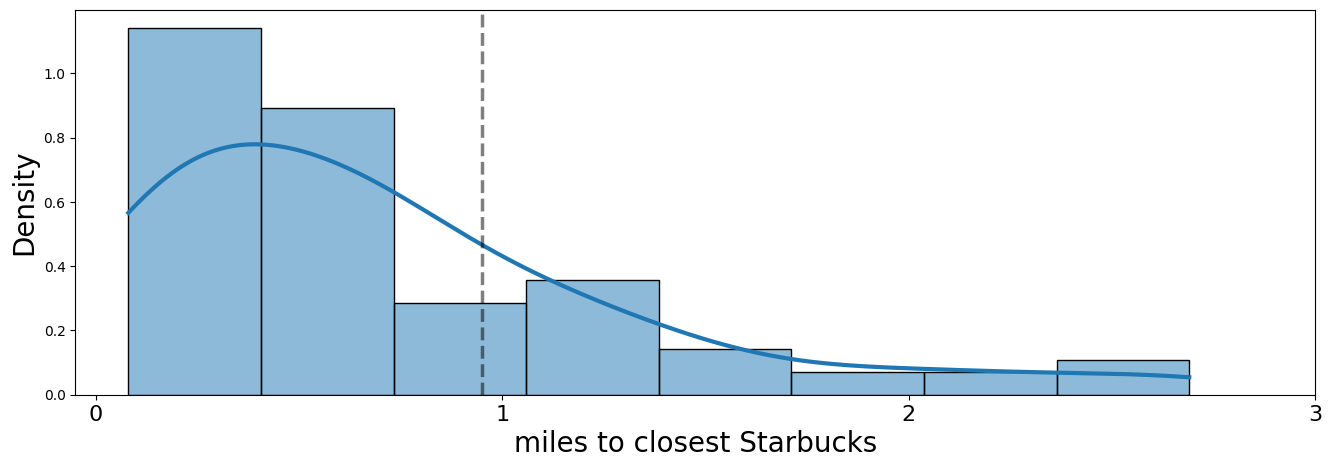

In [39]:
plt.figure(figsize=(16,5))
sns.histplot(closest_dists_lim, kde=True, line_kws={'linewidth': 3}, stat='density')
plt.xlabel('miles to closest Starbucks', fontsize=20)
plt.xticks(np.arange(0, 3.1), fontsize=16)
plt.ylabel('Density', fontsize=20)
plt.axvline(np.mean(closest_dists), color='k', linestyle='--', linewidth=2.5, alpha=0.5)